In [ ]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
data = pd.read_csv('Google_Stock_Price_Train.csv')

NameError: ignored

In [ ]:
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
df = data[['Date','Open']]

In [ ]:
df

,Date,Open
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04
...,...,...
1253,12/23/2016,790.90
1254,12/27/2016,790.68
1255,12/28/2016,793.70
1256,12/29/2016,783.33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


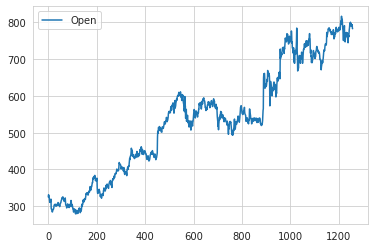

In [ ]:
df.plot()
plt.show()

In [ ]:
df.columns = ['ds','y']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1258 non-null   object 
 1   y       1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1258 non-null   datetime64[ns]
 1   y       1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [ ]:
df

,ds,y
0,2012-01-03,325.25
1,2012-01-04,331.27
2,2012-01-05,329.83
3,2012-01-06,328.34
4,2012-01-09,322.04
...,...,...
1253,2016-12-23,790.90
1254,2016-12-27,790.68
1255,2016-12-28,793.70
1256,2016-12-29,783.33


In [ ]:
from fbprophet import Prophet

In [ ]:
# Initialize the Model
model = Prophet()

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [ ]:
future_dates

,ds
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09
...,...
1618,2017-12-26
1619,2017-12-27
1620,2017-12-28
1621,2017-12-29


In [ ]:
prediction = model.predict(future_dates)

In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,298.415990,280.603852,333.067236,298.415990,298.415990,8.978357,8.978357,8.978357,-5.164307,-5.164307,-5.164307,14.142664,14.142664,14.142664,0.0,0.0,0.0,307.394348
1,2012-01-04,298.570120,281.915669,333.903135,298.570120,298.570120,8.795712,8.795712,8.795712,-4.819263,-4.819263,-4.819263,13.614976,13.614976,13.614976,0.0,0.0,0.0,307.365832
2,2012-01-05,298.724250,282.073036,331.334130,298.724250,298.724250,8.505491,8.505491,8.505491,-4.555752,-4.555752,-4.555752,13.061243,13.061243,13.061243,0.0,0.0,0.0,307.229742
3,2012-01-06,298.878381,280.750568,334.745384,298.878381,298.878381,8.019322,8.019322,8.019322,-4.464686,-4.464686,-4.464686,12.484008,12.484008,12.484008,0.0,0.0,0.0,306.897703
4,2012-01-09,299.340771,278.960477,329.813462,299.340771,299.340771,4.575316,4.575316,4.575316,-6.065235,-6.065235,-6.065235,10.640551,10.640551,10.640551,0.0,0.0,0.0,303.916087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2017-12-26,844.783259,706.376604,982.816777,698.784845,967.497904,11.897080,11.897080,11.897080,-5.164307,-5.164307,-5.164307,17.061387,17.061387,17.061387,0.0,0.0,0.0,856.680339
1619,2017-12-27,844.955981,711.949460,985.194999,698.304619,968.121764,11.973566,11.973566,11.973566,-4.819263,-4.819263,-4.819263,16.792830,16.792830,16.792830,0.0,0.0,0.0,856.929547
1620,2017-12-28,845.128703,708.878840,985.650072,697.824393,968.767169,11.928350,11.928350,11.928350,-4.555752,-4.555752,-4.555752,16.484101,16.484101,16.484101,0.0,0.0,0.0,857.057053
1621,2017-12-29,845.301426,708.242467,985.615125,697.230141,969.412573,11.672118,11.672118,11.672118,-4.464686,-4.464686,-4.464686,16.136804,16.136804,16.136804,0.0,0.0,0.0,856.973544


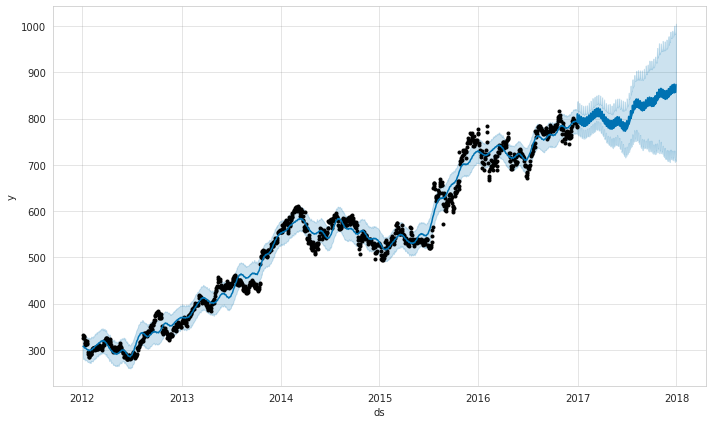

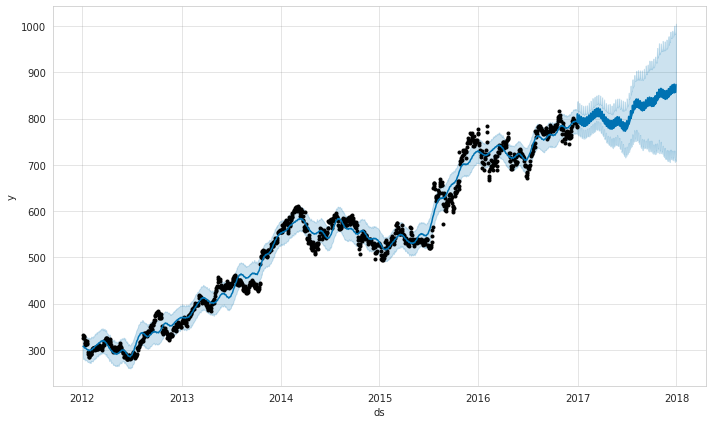

In [ ]:
### plot the predicted projection
model.plot(prediction)

In [ ]:
prediction['yhat']

0       307.394348
1       307.365832
2       307.229742
3       306.897703
4       303.916087
           ...    
1618    856.680339
1619    856.929547
1620    857.057053
1621    856.973544
1622    873.761358
Name: yhat, Length: 1623, dtype: float64

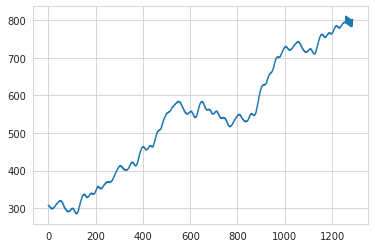

In [ ]:
plt.plot(prediction['yhat'])